In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Golden Section Search

In [2]:
def goldenSectionSearch(objective,
                        interval,
                        tolerance,
                        maxima=True,
                        max_iterations=10000):
    """
    Implementation for the Golden Section Search Algorithm
    which works for unimodal functions i.e. the functions that
    contain only one local maxima or minima in the given interval

    Parameters
    ----------
    objective : function
        The objective function for which the minimum/maxima is to be found
    interval : tuple
        The interval in which the function is to be searched for the
        minimum/maxima i.e. (low, high)
    tolerance : float
        The tolerance is for the terminating condition of the algorithm
        i.e. the algorithm will terminate when the length of the interval
        is less than the tolerance
    maxima : bool
        If True, the algorithm will search for the maximum else it will
        search for the minimum
    max_iterations : int
        The maximum number of iterations for the algorithm

    Returns
    -------
    optima : float
        The point at which the optimum value is found
    optimum : float
        The optimum value of the function at the optimum point
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting.
    """

    low, high = interval
    iteration = 0
    cache = []
    x1 = low + 0.382 * (high - low)
    x2 = low + 0.618 * (high - low)
    f1 = objective(x1)
    f2 = objective(x2)
    while abs(high - low) > tolerance and iteration < max_iterations:
        cache.append((low, high, x1, x2, f1, f2))
        if maxima:
            if f1 > f2:
                high = x2
                x2 = x1
                f2 = f1
                x1 = low + 0.382 * (high - low)
                f1 = objective(x1)
            else:
                low = x1
                x1 = x2
                f1 = f2
                x2 = low + 0.618 * (high - low)
                f2 = objective(x2)
        else:
            if f1 < f2:
                high = x2
                x2 = x1
                f2 = f1
                x1 = low + 0.382 * (high - low)
                f1 = objective(x1)
            else:
                low = x1
                x1 = x2
                f1 = f2
                x2 = low + 0.618 * (high - low)
                f2 = objective(x2)
        iteration += 1
    cache.append((low, high, x1, x2, f1, f2))
    if maxima:
        return x1, f1, cache
    else:
        return x1, f1, cache

### Bisection Search Algorithms

In [3]:
def bisectionSearch(objective,
                    derivative_objective,
                    interval,
                    tolerance,
                    maxima=True,
                    max_iterations=10000):
    """
    Implementation for the Bisection Search Algorithm which works for
    unimodal functions for finding the value maxima or minima of the function

    Parameters
    ----------
    objective : function
        The objective function for which the minimum/maxima is to be found
    derivative_objective : function
        The derivative of the objective function for which the minimum/maxima is to be found
    interval : tuple
        The interval in which the function is to be searched for the
        minimum/maxima i.e. (low, high)
    tolerance : float
        The tolerance is for the terminating condition of the algorithm
        i.e. the algorithm will terminate when the length of the interval
        is less than the tolerance
    maxima : bool
        If True, the algorithm will search for the maximum else it will
        search for the minimum
    max_iterations : int
        The maximum number of iterations for the algorithm

    Returns
    -------
    optima : float
        The point at which the optimum value is found
    optimum : float
        The optimum value of the function at the optimum point
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting.
    """
    a, b = interval
    cache = []
    n = 0
    while abs(b - a) > tolerance:
        n += 1
        if n > max_iterations:
            raise ValueError("Maximum number of iterations reached")
        c = (a + b) / 2
        f_c = objective(c)
        df_c = derivative_objective(c)
        if df_c == 0:
            raise ValueError("Zero derivative encountered")
        elif df_c > 0:
            if maxima:
                b = c
            else:
                a = c
        else:
            if maxima:
                a = c
            else:
                b = c
        cache.append((a, b, c, f_c, df_c))
    if maxima:
        optima = a
        optimum = objective(a)
    else:
        optima = b
        optimum = objective(b)

    return optima, optimum, cache



### Newton's Method

In [4]:
def newtonMethod(objective,
                  derivative_objective,
                  double_derivative_objective,
                  tolerance,
                  interval=None,
                  max_patience=5,
                  max_iterations=10000):
    """
    Implementation for the Newton Raphson Algorithm which works for
    unimodal functions for finding the value maxima or minima of the function

    Parameters
    ----------
    objective : function
        The objective function for which the minimum/maxima is to be found
    derivative_objective : function
        The derivative of the objective function for which the minimum/maxima is to be found
    double_derivative_objective : function
        The double derivative of the objective function for which the minimum/maxima is to be found
    tolerance : float
        The tolerance is for the terminating condition of the algorithm
    interval : tuple
        The interval in which the function lies, if the interval is not given then the algorithm
        will consider it to be (-inf, inf)
    max_patience : int
        The maximum number of iterations for which the algorithm can be stuck in the corner of the interval
    max_iterations : int
        The maximum number of iterations for the algorithm

    Returns
    -------
    optima : float
        The point at which the optimum value is found
    optimum : float
        The optimum value of the function at the optimum point
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting.
    """
    x = interval[0] if interval is not None else 0
    cache = []
    n = 0
    patience = 0
    while abs(objective(x)) > tolerance:
        n += 1
        if n > max_iterations:
            raise ValueError("Maximum number of iterations reached")
        if abs(derivative_objective(x)) < tolerance:
            patience += 1
            if patience > max_patience:
                raise ValueError("Algorithm is stuck in the corner of the interval")
        x -= objective(x) / derivative_objective(x)
        cache.append((x, objective(x), derivative_objective(x), double_derivative_objective(x)))
    optima = x
    optimum = objective(x)

    return optima, optimum, cache


### Plotting and Visualization

Given below are a few common practices observed in plotting:

### Text
a)```plt.annotate()```: to include annotations
Annotations are small bits of text that can be added to certain parts of the plot to add a bit more information about special points, or regions in your plots that may carry slightly more significance.

b) ```plt.text()``` to write standard text
This function is used to add text beyond the regions where your actual plot lies.

c) Use ```r"<tex>"``` to write'latex text'
Use this function to display scientific symbols.

#### Labelling
a) ```plt.legend()``` to include legends in the plots; Also specify the location of the legend
For plots containing multiple functions, it is important to indicate which set of lines or symbols represent what function. Specify the location to maintain uniformity in the plots.

b) ```plt.grid()``` for grids to be incorporated
It is often essential to add gridlines to plots, which helps point out certain values and changes in plot characteristics.

c) ```plt.xlabel()``` and ```plt.ylabel()``` to include labels

d) ```plt.title()``` to assign a title

e) ```plt.xlim()``` and ```plt.ylim()``` for setting the interval in which the plot is visible
Sometimes it is more useful to modify the interval in which the plot is visible to convey critical information.

f) ```plt.xticks()``` and ```plt.yticks()``` for setting ticks
Ticks also help in indicating values which in turn increases the clarity of the plot.

#### Miscellaneous
a) ```plt.savefig()``` to save plots onto your device

b) ```plt.show()``` to display the plots

c) ```plt.figure()``` to create a figure and adjust its dimensions

d) ```plt.subplot()``` to create multiple subplots within a figure if needed

e) ```plt.subplots_adjust()``` to adjust the spacing between subplots

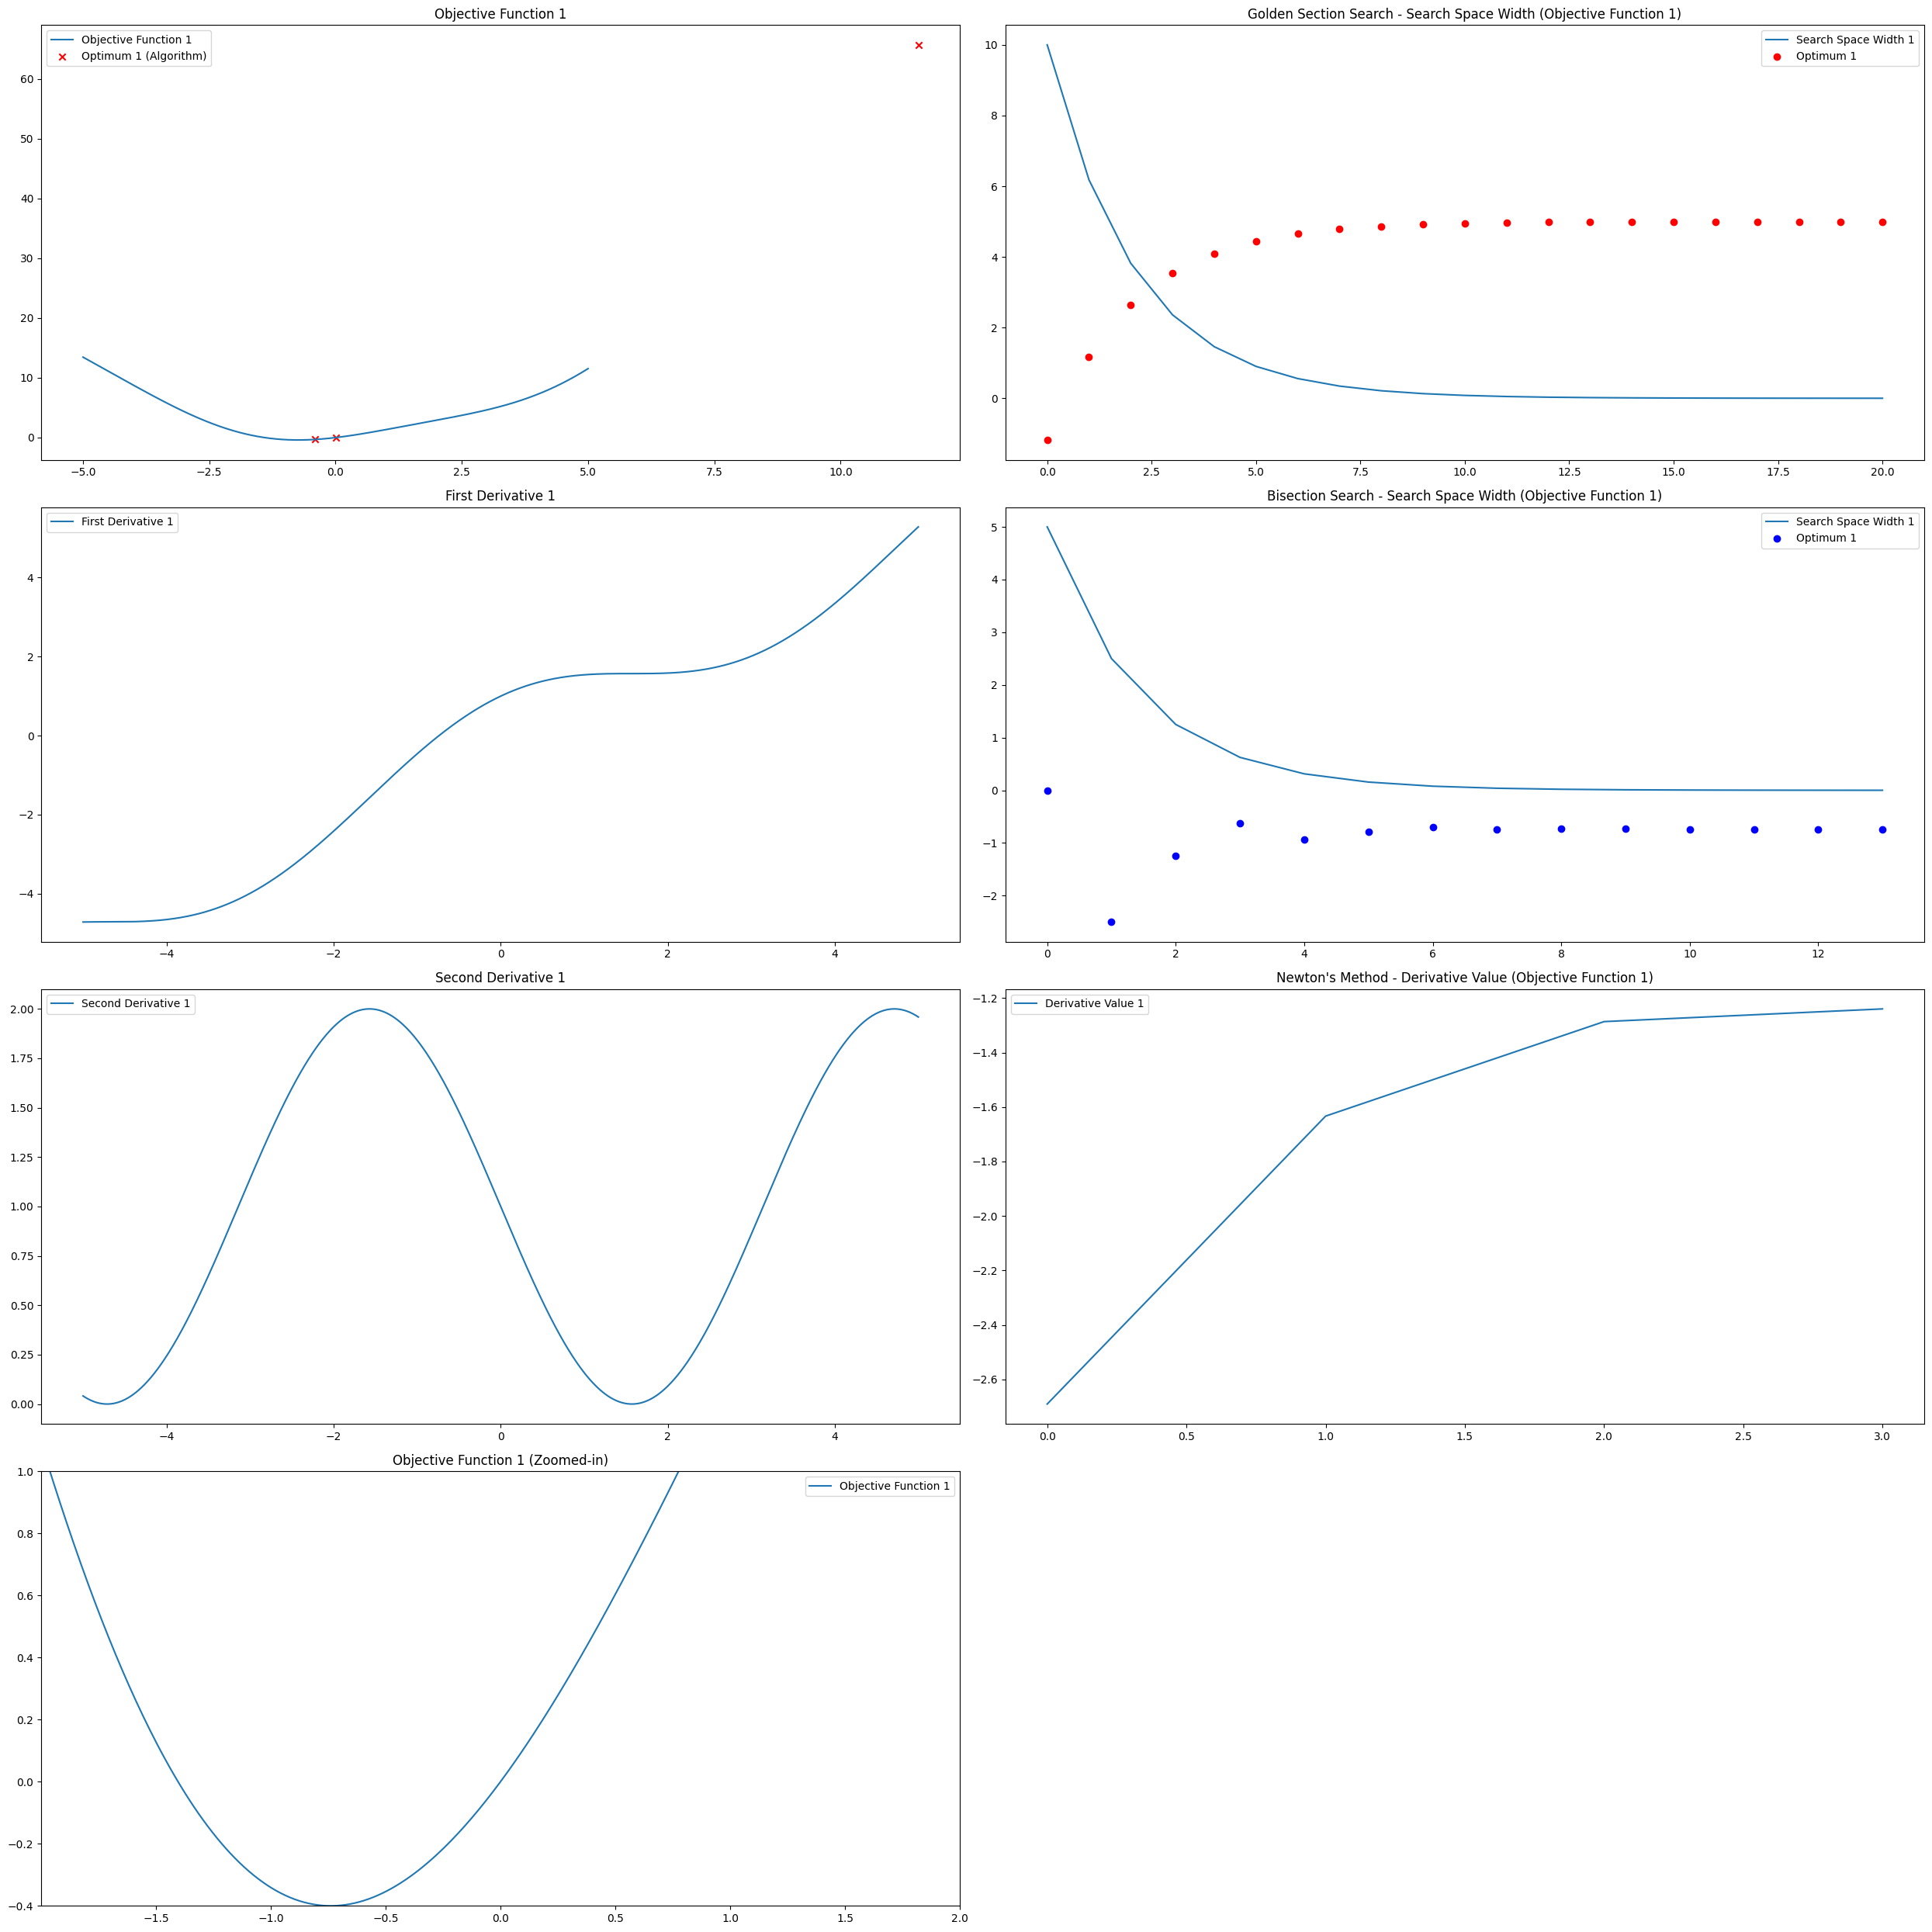

In [36]:
# Define your first convex objective functions, derivatives, and double derivatives
def objective_function1(x):
    return 0.5 * x**2 + np.sin(x)

def derivative_function1(x):
    return  x + np.cos(x)

def double_derivative_function1(x):
    return 1 - np.sin(x)

# Define the interval for the optimization
interval = (-5, 5)

# Golden Section Search for Objective Function 1
optima_golden1, optimum_golden1, cache_golden1 = goldenSectionSearch(objective_function1, interval, tolerance=0.001)

# Bisection Search for Objective Function 1
optima_bisection1, optimum_bisection1, cache_bisection1 = bisectionSearch(objective_function1, derivative_function1, interval, tolerance=0.001)

# Newton's Method for Objective Function 1
optima_newton1, optimum_newton1, cache_newton1 = newtonMethod(objective_function1, derivative_function1, double_derivative_function1, tolerance=0.001, interval=interval)

optimal_x = -1.5

# Calculate errors for Golden Section Search
error_function_golden1 = np.abs(objective_function1(optimum_golden1) - optimum_golden1)
error_optimum_golden1 = np.abs(optimum_golden1 - optimal_x)

# Calculate errors for Bisection Search
error_function_bisection1 = np.abs(objective_function1(optimum_bisection1) - optimum_bisection1)
error_optimum_bisection1 = np.abs(optimum_bisection1 - optimal_x)

# Calculate errors for Newton's Method
error_function_newton1 = np.abs(objective_function1(optimum_newton1) - optimum_newton1)
error_optimum_newton1 = np.abs(optimum_newton1 - optimal_x)

# Plotting
x_values = np.linspace(interval[0], interval[1], 1000)
plt.figure(figsize=(25,25))

# Plot the first objective function and its derivatives
plt.subplot(4, 2, 1)
plt.plot(x_values, objective_function1(x_values), label='Objective Function 1')
plt.scatter([optimum_golden1, optimum_bisection1, optimum_newton1], [objective_function1(optimum_golden1), objective_function1(optimum_bisection1), objective_function1(optimum_newton1)], color='red', marker='x', label='Optimum 1 (Algorithm)')
plt.title('Objective Function 1')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(x_values, derivative_function1(x_values), label='First Derivative 1')
plt.title('First Derivative 1')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(x_values, double_derivative_function1(x_values), label='Second Derivative 1')
plt.title('Second Derivative 1')
plt.legend()

# Plot the search space width for Golden Section Search on Objective Function 1
plt.subplot(4, 2, 2)
widths_golden1 = [high - low for low, high, _, _, _, _ in cache_golden1]
plt.plot(widths_golden1, label='Search Space Width 1')
optima_values_golden1 = [x1 for _, _, x1, _, _, _ in cache_golden1]
plt.scatter(range(len(optima_values_golden1)), optima_values_golden1, color='red', label='Optimum 1')
plt.title('Golden Section Search - Search Space Width (Objective Function 1)')
plt.legend()

# Plot the search space width for Bisection Search on Objective Function 1
plt.subplot(4, 2, 4)
widths_bisection1 = [b - a for a, b, _, _, _ in cache_bisection1]
plt.plot(widths_bisection1, label='Search Space Width 1')
optima_values_bisection1 = [c for _, _, c, _, _ in cache_bisection1]
plt.scatter(range(len(optima_values_bisection1)), optima_values_bisection1, color='blue', label='Optimum 1')
plt.title('Bisection Search - Search Space Width (Objective Function 1)')
plt.legend()

# Plot the derivative values during Newton's Method iterations for Objective Function 1
plt.subplot(4, 2, 6)
derivatives_newton1 = [derivative for _, _, derivative, _ in cache_newton1]
plt.plot(derivatives_newton1, label='Derivative Value 1')
plt.title("Newton's Method - Derivative Value (Objective Function 1)")
plt.legend()


# Plot a zoomed-in view of the obtained optimum vs. the actual optimum for Objective Function 1
plt.subplot(4, 2, 7)
plt.plot(x_values, objective_function1(x_values), label='Objective Function 1')
plt.title('Objective Function 1 (Zoomed-in)')
plt.xlim(optimum_newton1 - 2, optimum_newton1 + 2)
plt.ylim(min(objective_function1(x_values)), objective_function1(optimum_newton1) + 1)
plt.legend()



plt.tight_layout()
plt.show()

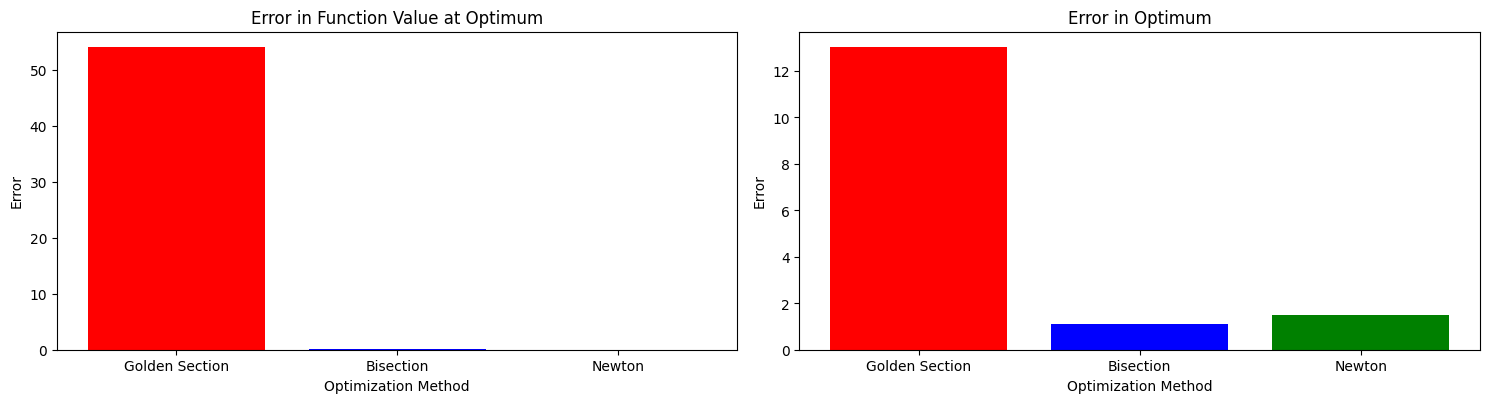

In [49]:
plt.figure(figsize=(15,15))
# Bar plot for error in the value of the function
plt.subplot(4, 2, 1)
errors_function = [error_function_golden1, error_function_bisection1, error_function_newton1]
labels = ['Golden Section', 'Bisection', 'Newton']
plt.bar(labels, errors_function, color=['red', 'blue', 'green'])
plt.title('Error in Function Value at Optimum')
plt.ylabel('Error')
plt.xlabel('Optimization Method')


# Bar plot for error in the optimum
plt.subplot(4, 2, 2)
errors_optimum = [error_optimum_golden1, error_optimum_bisection1, error_optimum_newton1]
plt.bar(labels, errors_optimum, color=['red', 'blue', 'green'])
plt.title('Error in Optimum')
plt.ylabel('Error')
plt.xlabel('Optimization Method')

plt.tight_layout()
plt.show()


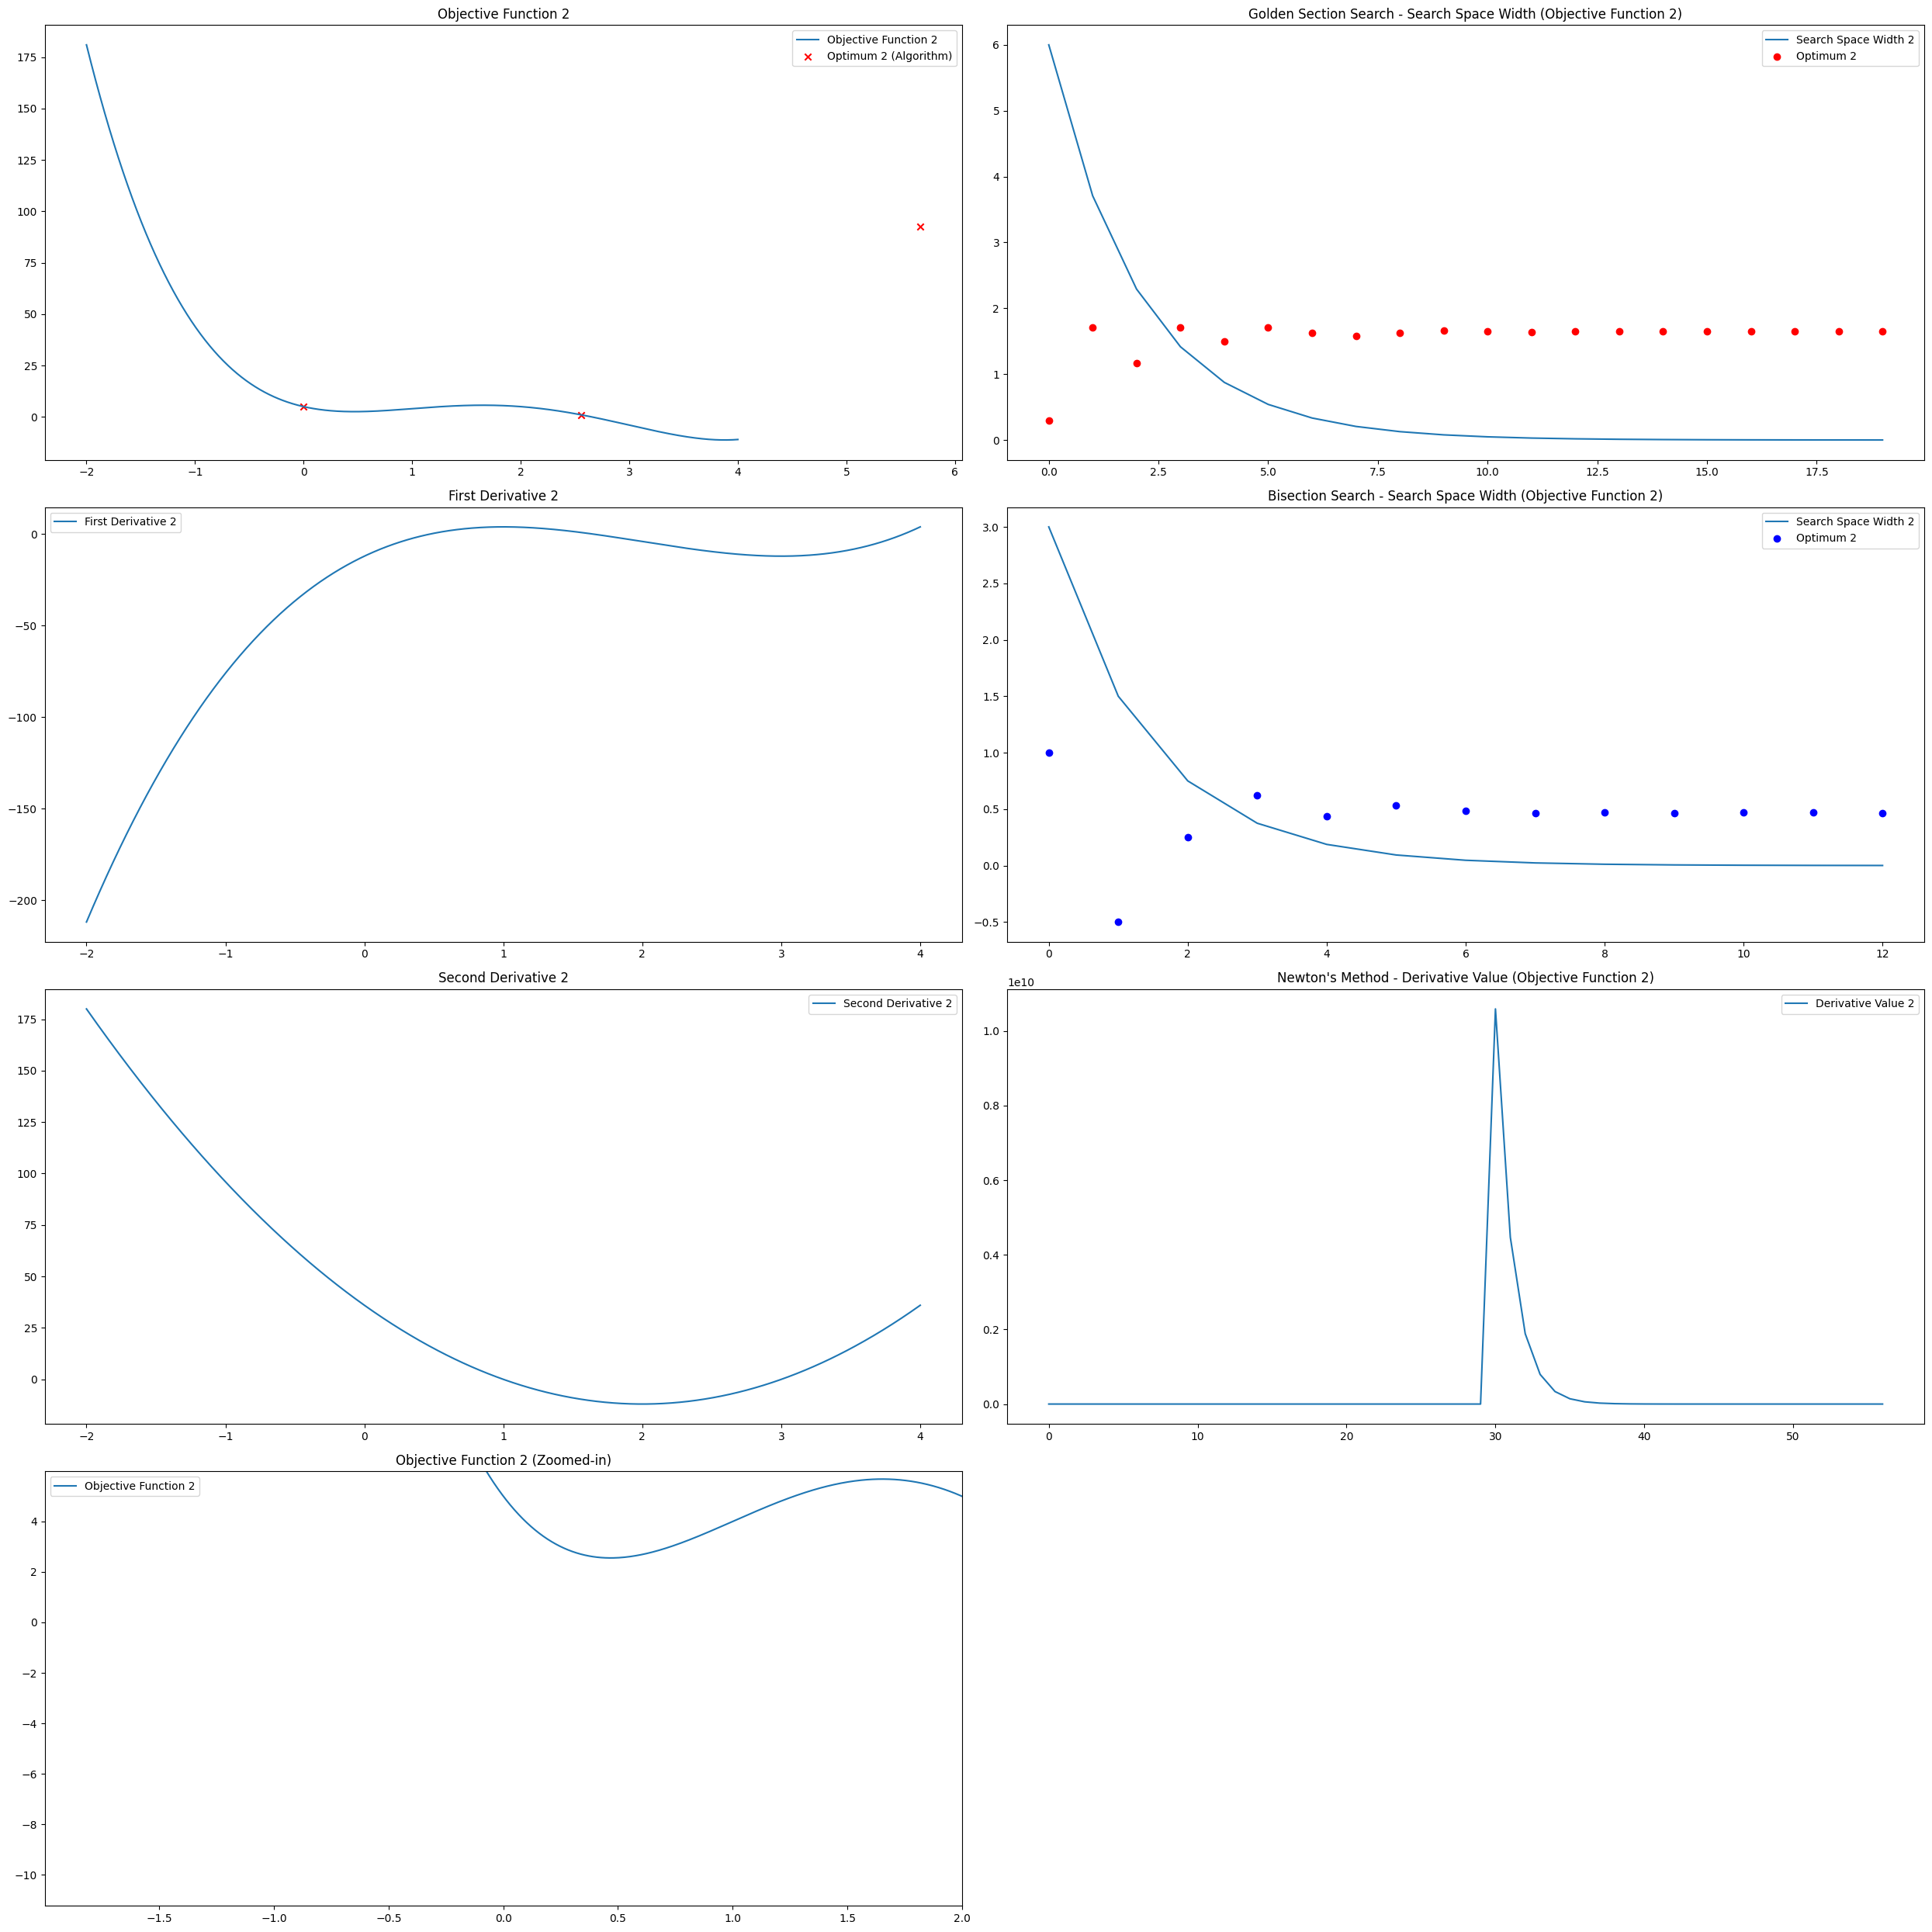

In [61]:
# Define your second convex objective functions, derivatives, and double derivatives
def objective_function2(x):
    return x**4 - 8*x**3 + 18*x**2 - 12*x + 5

def derivative_function2(x):
    return 4*x**3 - 24*x**2 + 36*x - 12

def double_derivative_function2(x):
    return 12*x**2 - 48*x + 36

interval=(-2,4)
# Golden Section Search for Objective Function 2
optima_golden2, optimum_golden2, cache_golden2 = goldenSectionSearch(objective_function2, interval, tolerance=0.001)

# Bisection Search for Objective Function 2
optima_bisection2, optimum_bisection2, cache_bisection2 = bisectionSearch(objective_function2, derivative_function2, interval, tolerance=0.001)

# Newton's Method for Objective Function 2
optima_newton2, optimum_newton2, cache_newton2 = newtonMethod(objective_function2, derivative_function2, double_derivative_function2, tolerance=0.001, interval=interval)

optimal_x = 0.47

# Calculate errors for Golden Section Search
error_function_golden2 = np.abs(objective_function2(optimum_golden2) - optimum_golden1)
error_optimum_golden2 = np.abs(optimum_golden2 - optimal_x)

# Calculate errors for Bisection Search
error_function_bisection2 = np.abs(objective_function2(optimum_bisection2) - optimum_bisection2)
error_optimum_bisection2 = np.abs(optimum_bisection2 - optimal_x)

# Calculate errors for Newton's Method
error_function_newton2 = np.abs(objective_function2(optimum_newton2) - optimum_newton2)
error_optimum_newton2 = np.abs(optimum_newton2 - optimal_x)

# Plotting
x_values = np.linspace(interval[0], interval[1], 1000)
plt.figure(figsize=(25,25))

# Plot the second objective function and its derivatives
plt.subplot(4, 2, 1)
plt.plot(x_values, objective_function2(x_values), label='Objective Function 2')
plt.scatter([optimum_golden2, optimum_bisection2, optimum_newton2], [objective_function2(optimum_golden2), objective_function2(optimum_bisection2), objective_function2(optimum_newton2)], color='red', marker='x', label='Optimum 2 (Algorithm)')
plt.title('Objective Function 2')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(x_values, derivative_function2(x_values), label='First Derivative 2')
plt.title('First Derivative 2')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(x_values, double_derivative_function2(x_values), label='Second Derivative 2')
plt.title('Second Derivative 2')
plt.legend()

# Plot the search space width for Golden Section Search on Objective Function 2
plt.subplot(4, 2, 2)
widths_golden2 = [high - low for low, high, _, _, _, _ in cache_golden2]
plt.plot(widths_golden2, label='Search Space Width 2')
optima_values_golden2 = [x1 for _, _, x1, _, _, _ in cache_golden2]
plt.scatter(range(len(optima_values_golden2)), optima_values_golden2, color='red', label='Optimum 2')
plt.title('Golden Section Search - Search Space Width (Objective Function 2)')
plt.legend()

# Plot the search space width for Bisection Search on Objective Function 2
plt.subplot(4, 2, 4)
widths_bisection2 = [b - a for a, b, _, _, _ in cache_bisection2]
plt.plot(widths_bisection2, label='Search Space Width 2')
optima_values_bisection2 = [c for _, _, c, _, _ in cache_bisection2]
plt.scatter(range(len(optima_values_bisection2)), optima_values_bisection2, color='blue', label='Optimum 2')
plt.title('Bisection Search - Search Space Width (Objective Function 2)')
plt.legend()

# Plot the derivative values during Newton's Method iterations for Objective Function 1
plt.subplot(4, 2, 6)
derivatives_newton2 = [derivative for _, _, derivative, _ in cache_newton2]
plt.plot(derivatives_newton2, label='Derivative Value 2')
plt.title("Newton's Method - Derivative Value (Objective Function 2)")
plt.legend()


# Plot a zoomed-in view of the obtained optimum vs. the actual optimum for Objective Function 1
plt.subplot(4, 2, 7)
plt.plot(x_values, objective_function2(x_values), label='Objective Function 2')
plt.title('Objective Function 2 (Zoomed-in)')
plt.xlim(optimum_newton2 - 2, optimum_newton2 + 2)
plt.ylim(min(objective_function2(x_values)), objective_function2(optimum_newton1) + 1)
plt.legend()

plt.tight_layout()
plt.show()


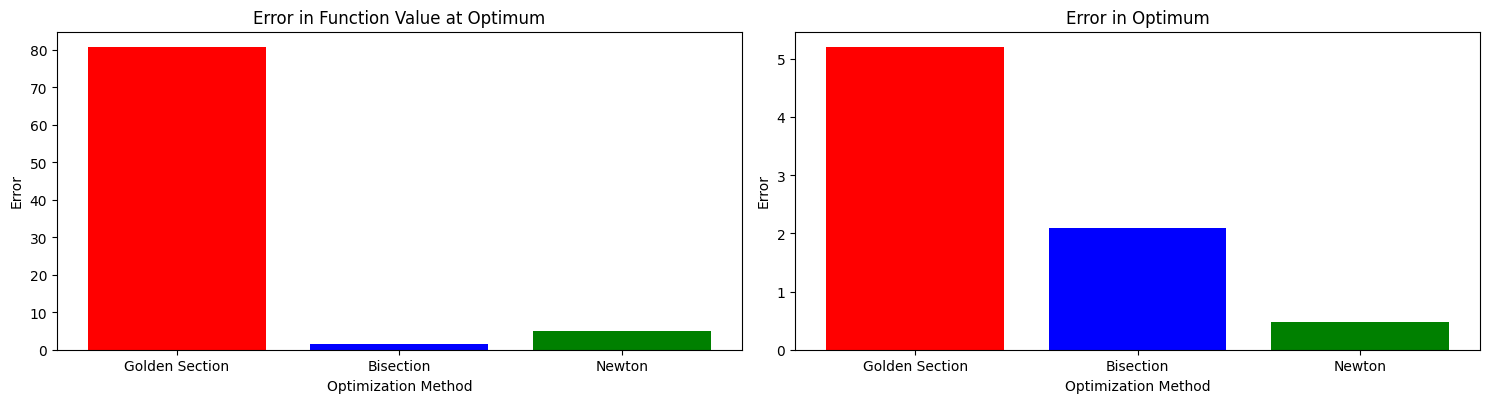

In [62]:
plt.figure(figsize=(15,15))
# Bar plot for error in the value of the function
plt.subplot(4, 2, 1)
errors_function = [error_function_golden2, error_function_bisection2, error_function_newton2]
labels = ['Golden Section', 'Bisection', 'Newton']
plt.bar(labels, errors_function, color=['red', 'blue', 'green'])
plt.title('Error in Function Value at Optimum')
plt.ylabel('Error')
plt.xlabel('Optimization Method')


# Bar plot for error in the optimum
plt.subplot(4, 2, 2)
errors_optimum = [error_optimum_golden2, error_optimum_bisection2, error_optimum_newton2]
plt.bar(labels, errors_optimum, color=['red', 'blue', 'green'])
plt.title('Error in Optimum')
plt.ylabel('Error')
plt.xlabel('Optimization Method')

plt.tight_layout()
plt.show()


